## Adversarial Attack on Cifar-10 dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import random
# data manipulation libraries
import numpy as np
import pandas as pd	

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

2025-05-08 09:28:16.584912: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 09:28:16.642281: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 09:28:16.664808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746689296.710682    8022 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746689296.720470    8022 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746689296.788333    8022 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
# 1. Load and preprocess CIFAR-10 dataset and split it into train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

/tmp/ipykernel_8022/4016623427.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_labels, palette='Set2')
/tmp/ipykernel_8022/4016623427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_labels, palette='Set2')


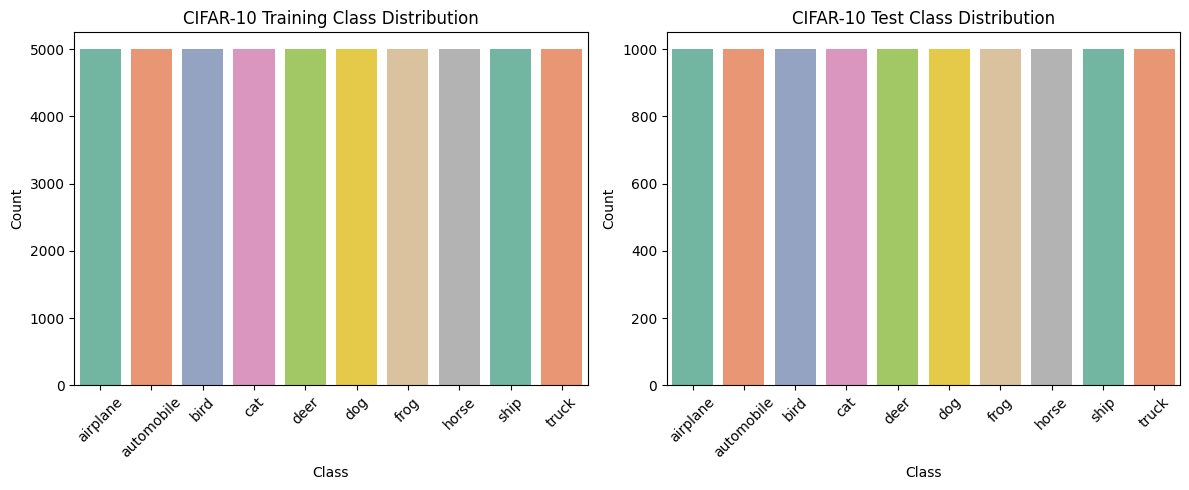

In [4]:
# CIFAR-10 class names in order:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Visualize class distribution in training and test data
train_labels = np.argmax(y_train, axis=1)
test_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=train_labels, palette='Set2')
plt.title('CIFAR-10 Training Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)

plt.subplot(1,2,2)
sns.countplot(x=test_labels, palette='Set2')
plt.title('CIFAR-10 Test Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)

plt.tight_layout()
plt.show()

### Compile a CNN

In [5]:
# 2. Define a simple CNN model (or use a pretrained model)
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_cnn()
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/home/ryanpuglia/.conda/envs/BSP6_cifar/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1746689300.589230    8022 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1746689300.591637    8022 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 Train the model on Cifar-10

In [6]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10


2025-05-08 09:28:20.877586: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


352/352 ━━━━━━━━━━━━━━━━━━━━ 49s 136ms/step - accuracy: 0.2607 - loss: 2.4886 - val_accuracy: 0.1388 - val_loss: 2.4873
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 131ms/step - accuracy: 0.4586 - loss: 1.4845 - val_accuracy: 0.6058 - val_loss: 1.1266
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 48s 136ms/step - accuracy: 0.5477 - loss: 1.2450 - val_accuracy: 0.6540 - val_loss: 0.9831
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 48s 135ms/step - accuracy: 0.6128 - loss: 1.0836 - val_accuracy: 0.6566 - val_loss: 1.0307
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 47s 134ms/step - accuracy: 0.6450 - loss: 0.9985 - val_accuracy: 0.6754 - val_loss: 0.9360
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 47s 133ms/step - accuracy: 0.6762 - loss: 0.9169 - val_accuracy: 0.6870 - val_loss: 0.9189
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 47s 133ms/step - accuracy: 0.7066 - loss: 0.8494 - val_accuracy: 0.6690 - val_loss: 0.9756
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 47s 134ms/step - accuracy: 0.7248 - loss: 0.7875 - val

In [7]:
cnn_test_accuracy = model.evaluate(x_test, y_test)
print("Accuracy on test data is : ", cnn_test_accuracy[1] * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7322 - loss: 0.7710
Accuracy on test data is :  73.47000241279602


## Implement FGSM attack

In [11]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

# 4. Define FGSM attack with optional patch mask
def fgsm_attack(model, image, label, eps=0.01, mask=None):
    image_var = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image_var)
        prediction = model(image_var)
        loss = tf.keras.losses.CategoricalCrossentropy()(label, prediction)
    grad = tape.gradient(loss, image_var)
    signed_grad = tf.sign(grad)
    if mask is not None:
        signed_grad = signed_grad * mask
    adv = image_var + eps * signed_grad
    adv = tf.clip_by_value(adv, 0.0, 1.0)
    return adv

### Applying the attack to 5 random images from the dataset and visualising them:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Clean accuracy on 5 samples:       80.0%
Adversarial accuracy (eps=0.05):  0.0%



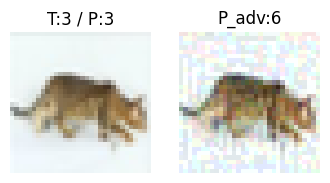

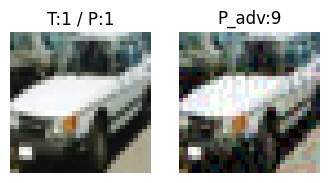

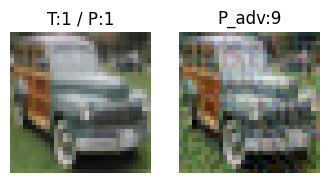

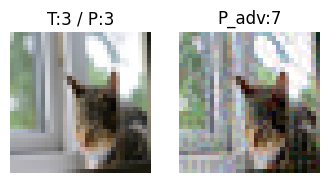

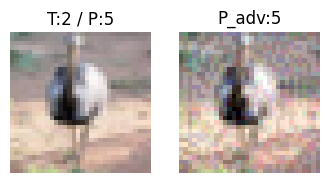

In [12]:
#Sample 5 random test images + labels
num_samples = 5
indices = random.sample(range(x_test.shape[0]), num_samples)
orig_imgs = x_test[indices]
orig_lbls = y_test[indices]  

eps = 0.05
adv_imgs = np.zeros_like(orig_imgs)
for i in range(num_samples):
    img = orig_imgs[i:i+1]
    lbl = orig_lbls[i:i+1]
    adv = fgsm_attack(model, img, lbl, eps=eps)
    adv_imgs[i] = adv[0]

clean_preds = np.argmax(model.predict(orig_imgs), axis=1)
adv_preds   = np.argmax(model.predict(adv_imgs),  axis=1)
true_labels = np.argmax(orig_lbls, axis=1)

# Print accuracies on these 5 samples
clean_acc = np.mean(clean_preds == true_labels)
adv_acc   = np.mean(adv_preds   == true_labels)
print(f"Clean accuracy on 5 samples:       {clean_acc*100:.1f}%")
print(f"Adversarial accuracy (eps={eps}):  {adv_acc*100:.1f}%\n")


# Visualize side-by-side
for i in range(num_samples):
    plt.figure(figsize=(4,2))
    # original
    plt.subplot(1,2,1)
    plt.imshow(orig_imgs[i])
    plt.title(f"T:{true_labels[i]} / P:{clean_preds[i]}")
    plt.axis('off')
    # adversarial
    plt.subplot(1,2,2)
    plt.imshow(adv_imgs[i])
    plt.title(f"P_adv:{adv_preds[i]}")
    plt.axis('off')
    plt.show()

### Function which applies a mask on a patch (patch size and position can be specified)

In [13]:

def create_patch_mask(image_shape, patch_size, patch_position=None):
    h, w, _ = image_shape
    mask = np.zeros((1, h, w, 1), dtype=np.float32)
    if patch_position is None:
        # center the patch
        y_start = (h - patch_size) // 2
        x_start = (w - patch_size) // 2
    else:
        y_start, x_start = patch_position
    mask[:, y_start:y_start+patch_size, x_start:x_start+patch_size, :] = 1.0
    return np.repeat(mask, image_shape[2], axis=-1)


### Applying the FGSM attack on patches of different sizes and evaluating their results:

In [14]:
def evaluate_attack(model, x_data, y_data, eps=0.01, patch_size=None, num_samples=1000):
    correct = 0
    total = 0
    for i in random.sample(range(len(x_data)), num_samples):
        img = x_data[i:i+1]
        lbl = y_data[i:i+1]
        # create mask if patch_size specified
        mask = None
        if patch_size is not None:
            mask = create_patch_mask(img.shape[1:], patch_size)
        adv_img = fgsm_attack(model, img, lbl, eps, mask)
        pred = np.argmax(model.predict(adv_img), axis=1)
        true = np.argmax(lbl, axis=1)
        if pred != true:
            correct += 1
        total += 1
    return correct / total


# 7. Run evaluations
full_attack_rate = evaluate_attack(model, x_test, y_test, eps=0.01, patch_size=None)
patch_sizes = [16, 8, 4]
results = {'full': full_attack_rate}
for size in patch_sizes:
    rate = evaluate_attack(model, x_test, y_test, eps=0.01, patch_size=size)
    results[f'patch_{size}'] = rate

print("Attack success rates:", results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

/tmp/ipykernel_8022/861585220.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=rates, palette='Set2')


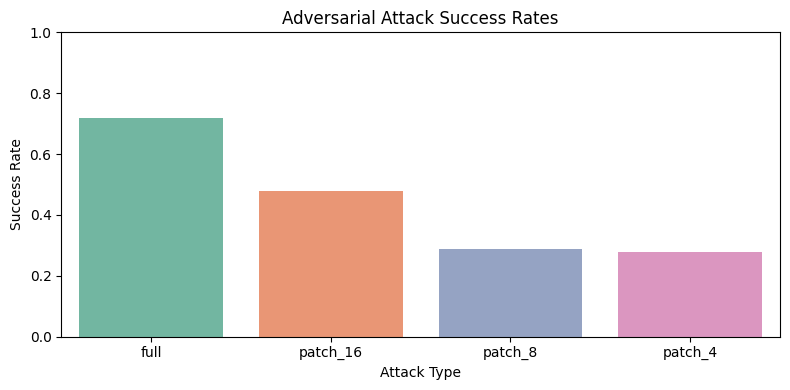

In [ ]:
labels = list(results.keys())
rates = list(results.values())

plt.figure(figsize=(8,4))
sns.barplot(x=labels, y=rates, palette='Set2')
plt.title('Adversarial Attack Success Rates')
plt.xlabel('Attack Type')
plt.ylabel('Success Rate')
plt.ylim(0,1)
plt.tight_layout()
plt.show()